# Improved Prediction using cleaned data+ stopwords and Word2Vec

Achieved better results by cleaning unnecessary punctuations and using NLTK stopwords to clean the text.



## Basic Imports

In [16]:
import re
import nltk
import gensim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your code here
# Perform scikit-learn operations that may generate warnings


## Loading Dataset

In [19]:
# Load the 20 Newsgroups dataset
categories = [
    'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos',
    'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
    'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian',
    'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'
]
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

## Data Cleaning Process

Here we perform the data cleaning process discussed in the intro section

In [20]:
# Function to clean up the text
def clean_text(text):
    # Remove user names
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwords]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [21]:
# Clean up the text in the dataset
cleaned_text = [clean_text(text) for text in newsgroups_train.data]

## Word2Vec Embeddings Extraction

In [22]:
# Create Word2Vec model
sentences = [nltk.word_tokenize(text) for text in cleaned_text]
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1)

In [23]:
# Convert text to Word2Vec vectors
word_vectors = np.zeros((len(cleaned_text), 100))
for i, sentence in enumerate(sentences):
    for word in sentence:
        if word in word2vec_model.wv:
            word_vectors[i] += word2vec_model.wv[word]

## Basic Housekeeping for classification task

In [24]:
# Function to print classification results
def print_classification_results(model_name, y_true, y_pred, label_limit=7):
    print(model_name + ":")
    print("------------------------")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()
    print()
    # Print actual versus predicted labels
    print("------------------------")
    actual_labels = [newsgroups_train.target_names[label] for label in y_true]
    predicted_labels = [newsgroups_train.target_names[label] for label in y_pred]
    print()
    print("------------------------")
    print(f"Actual vs Predicted Labels ({model_name}):")
    for actual, predicted in zip(actual_labels, predicted_labels):
        if label_limit > 0:
            print(f"Actual: {actual}  Predicted: {predicted}")
            label_limit -= 1
    print("------------------------")

In [25]:
# Classification function
def classification(model_name, X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the model based on the given model_name
    if model_name == "Logistic Regression":
        model = LogisticRegression()
    elif model_name == "SVC Linear":
        model = SVC(kernel='linear')
    elif model_name == "Random Forest":
        model = RandomForestClassifier()
    elif model_name == "XGBoost":
        model = XGBClassifier()
    else:
        print("Invalid model name!")
        return

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Print classification results
    print_classification_results(model_name, y_test, predictions)

## Classifiers Used:



*   Logistic Regression
*   SVC Linear
*   Random Forest
*   XGBoost



In [26]:
# Array of model names
models = ["Logistic Regression", "SVC Linear", "Random Forest", "XGBoost"]

### Logistic Regression

Logistic Regression:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        97
           1       0.40      0.46      0.43       104
           2       0.60      0.63      0.62       115
           3       0.56      0.42      0.48       123
           4       0.44      0.43      0.44       126
           5       0.67      0.75      0.71       106
           6       0.45      0.68      0.54       109
           7       0.54      0.36      0.43       139
           8       0.47      0.54      0.51       122
           9       0.53      0.60      0.56       102
          10       0.77      0.69      0.73       108
          11       0.79      0.80      0.79       125
          12       0.43      0.35      0.38       114
          13       0.49      0.58      0.53       119
          14       0.67      0.67      0.67       127
          15       0.65      0.69      0.67       122
          16

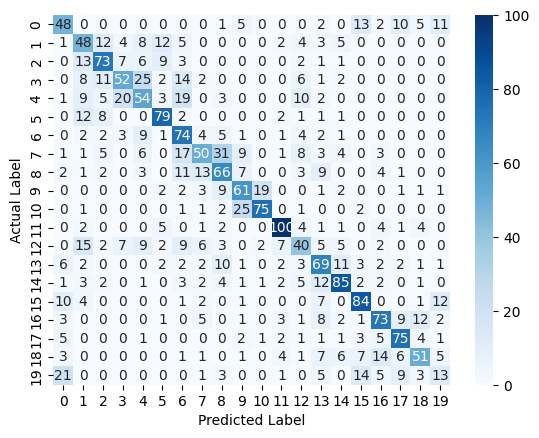


------------------------

------------------------
Actual vs Predicted Labels (Logistic Regression):
Actual: comp.sys.mac.hardware  Predicted: alt.atheism
Actual: comp.os.ms-windows.misc  Predicted: comp.sys.ibm.pc.hardware
Actual: misc.forsale  Predicted: comp.sys.ibm.pc.hardware
Actual: talk.politics.guns  Predicted: talk.politics.guns
Actual: rec.sport.hockey  Predicted: rec.sport.baseball
Actual: comp.sys.mac.hardware  Predicted: comp.sys.mac.hardware
Actual: talk.politics.misc  Predicted: talk.politics.misc
------------------------


In [27]:
classification(models[0], word_vectors, newsgroups_train.target)

### SVC Linear

SVC Linear:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        97
           1       0.44      0.61      0.51       104
           2       0.62      0.63      0.63       115
           3       0.56      0.58      0.57       123
           4       0.58      0.49      0.53       126
           5       0.72      0.77      0.75       106
           6       0.66      0.66      0.66       109
           7       0.60      0.62      0.61       139
           8       0.62      0.57      0.60       122
           9       0.64      0.79      0.71       102
          10       0.82      0.69      0.75       108
          11       0.89      0.86      0.87       125
          12       0.48      0.45      0.46       114
          13       0.69      0.65      0.67       119
          14       0.81      0.75      0.78       127
          15       0.75      0.66      0.70       122
          16       0.

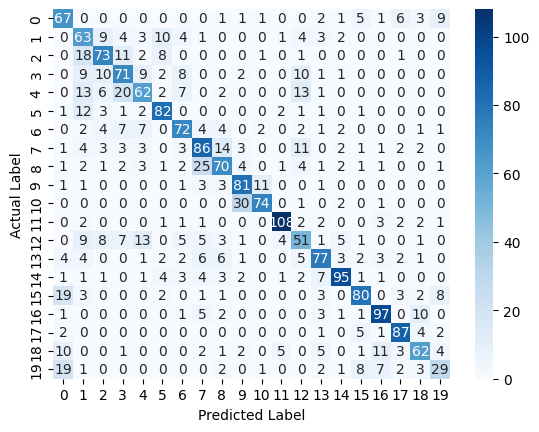


------------------------

------------------------
Actual vs Predicted Labels (SVC Linear):
Actual: comp.sys.mac.hardware  Predicted: sci.med
Actual: comp.os.ms-windows.misc  Predicted: comp.os.ms-windows.misc
Actual: misc.forsale  Predicted: misc.forsale
Actual: talk.politics.guns  Predicted: talk.politics.guns
Actual: rec.sport.hockey  Predicted: rec.sport.baseball
Actual: comp.sys.mac.hardware  Predicted: comp.sys.mac.hardware
Actual: talk.politics.misc  Predicted: talk.politics.misc
------------------------


In [28]:
classification(models[1], word_vectors, newsgroups_train.target)

### Random Forest

Random Forest:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51        97
           1       0.34      0.41      0.38       104
           2       0.56      0.54      0.55       115
           3       0.43      0.42      0.43       123
           4       0.43      0.35      0.39       126
           5       0.62      0.67      0.65       106
           6       0.52      0.68      0.59       109
           7       0.48      0.46      0.47       139
           8       0.40      0.43      0.41       122
           9       0.47      0.60      0.53       102
          10       0.73      0.67      0.70       108
          11       0.88      0.74      0.80       125
          12       0.34      0.29      0.31       114
          13       0.47      0.60      0.53       119
          14       0.62      0.63      0.63       127
          15       0.63      0.74      0.68       122
          16      

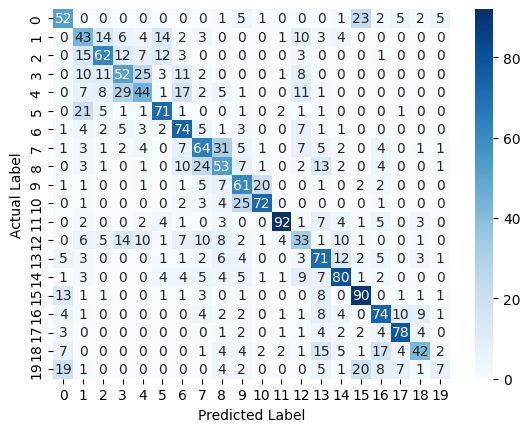


------------------------

------------------------
Actual vs Predicted Labels (Random Forest):
Actual: comp.sys.mac.hardware  Predicted: rec.sport.baseball
Actual: comp.os.ms-windows.misc  Predicted: comp.os.ms-windows.misc
Actual: misc.forsale  Predicted: comp.sys.mac.hardware
Actual: talk.politics.guns  Predicted: talk.politics.guns
Actual: rec.sport.hockey  Predicted: rec.sport.baseball
Actual: comp.sys.mac.hardware  Predicted: comp.graphics
Actual: talk.politics.misc  Predicted: talk.politics.misc
------------------------


In [29]:
classification(models[2], word_vectors, newsgroups_train.target)

### XGBoost

XGBoost:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        97
           1       0.41      0.39      0.40       104
           2       0.58      0.57      0.58       115
           3       0.43      0.45      0.44       123
           4       0.47      0.45      0.46       126
           5       0.63      0.68      0.65       106
           6       0.50      0.61      0.55       109
           7       0.49      0.45      0.47       139
           8       0.47      0.47      0.47       122
           9       0.50      0.61      0.55       102
          10       0.75      0.70      0.73       108
          11       0.86      0.74      0.79       125
          12       0.36      0.37      0.36       114
          13       0.52      0.64      0.58       119
          14       0.69      0.65      0.67       127
          15       0.64      0.73      0.68       122
          16       0.59 

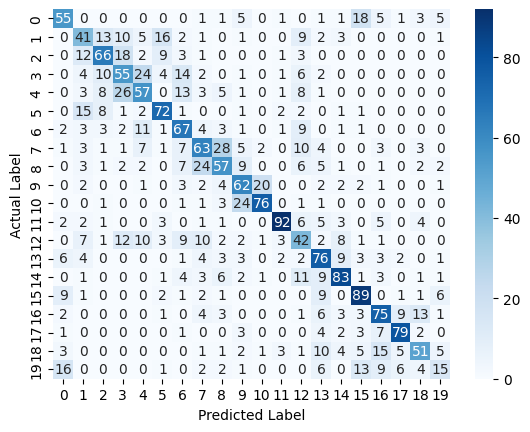


------------------------

------------------------
Actual vs Predicted Labels (XGBoost):
Actual: comp.sys.mac.hardware  Predicted: rec.sport.baseball
Actual: comp.os.ms-windows.misc  Predicted: comp.sys.ibm.pc.hardware
Actual: misc.forsale  Predicted: comp.sys.mac.hardware
Actual: talk.politics.guns  Predicted: talk.politics.guns
Actual: rec.sport.hockey  Predicted: rec.sport.baseball
Actual: comp.sys.mac.hardware  Predicted: comp.graphics
Actual: talk.politics.misc  Predicted: talk.politics.misc
------------------------


In [30]:
classification(models[3], word_vectors, newsgroups_train.target)

## Results

From the classification, we can see we have a clear winner, which is SVC Linear with 66% accuracy and fantatsic classification metrics and macro averages.